# **2조 미니 프로젝트 (1)**

# 1. 라이브러리 및 데이터 불러오기

- 프로젝트에 사용할 라이브러리 가져오기
- matplotlib 한글 깨짐방지를 위한 코드 실행하기

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

import warnings
warnings.filterwarnings(action='ignore')

- 프로젝트에 사용할 데이터 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks//movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv')

# 2. 탐색적 자료 분석(EDA)

**(1) 데이터셋(Dataset)의 내용**

1) movies_train.csv / movies_test.csv의 칼럼 내용
- title : 영화의 제목
- distributer : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독 이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객 수 (단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수 (단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝 수
- num_actor : 주연 배우 수
- box_off_num : 관객 수

2) submission.csv 데이터 상세 설명
- 2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터

**(2) 각 데이터셋 확인**

In [5]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [7]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


**(3) 각 데이터 요약 및 요약 통계량 확인**

1) shape ( ) 이용

In [8]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


- train의 경우, 600개의 행과 12개의 columns로 이루어져 있다.
- test의 경우, 243개의 행과 11개의 columns로 이루어져 있다. (box_off_num 제외)
- submission의 경우, 243개의 행과 2개의 columns로 이루어져 있다.

  -> 즉, 600개의 데이터를 학습시켜 243개의 데이터를 이용해 예측을 진행해야 한다.

2) info ( ) 이용

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


- train과 test 데이터셋을 info( )로 전반적인 구조를 확인하여 다음과 같은 전처리가 필요한 것을 확인할 수 있었다.
  - dir_prev_bfnum에서만 Non-Null의 수가 적은 것으로 보아 **결측치가 확인**되는 것을 알 수 있었다.

    -> 이때 dir_prev_dfnum은 **관객수** 이므로 결측값의 형태를 확인하고, int형이 아니라면 int형인 0으로 바꾸어주도록 하자.
  - 또한 release_time의 경우 **날짜 / 시간에 관련된 데이터**인데, 해당 데이터 타입이 object로 설정되어 있음을 확인할 수 있었다.

    -> 이를 **datetime64[ns] 타입**으로 변경해주어야 한다.

3) describe() 이용

In [11]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [12]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.000000,1.070000e+02,243.000000,243.000000,243.000000
mean,109.798354,8.916695e+05,0.851852,159.316872,3.477366
std,124.022711,1.217341e+06,1.200321,162.976607,2.111192
min,40.000000,3.400000e+01,0.000000,0.000000,0.000000
25%,91.000000,6.250200e+04,0.000000,18.000000,2.000000
50%,104.000000,4.931200e+05,0.000000,105.000000,3.000000
75%,114.500000,1.080850e+06,1.000000,282.000000,4.000000
max,2015.000000,6.173100e+06,6.000000,776.000000,16.000000


- describe()를 이용하여 각 데이터셋의 연속형 변수에 대한 요약값을 확인하였다.

**(4) 결측치 확인 및 데이터 전처리**

1) 결측치 확인

위에서 이미 info( )를 이용하여 결측치를 확인하였지만, isna()를 이용하여 결측치에 대한 개수를 추가적으로 확인하도록 하자.

In [13]:
train.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


In [14]:
test.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,136
dir_prev_num,0
num_staff,0


- 위에서 확인했듯이 train 데이터에는 dir_prev_bfnum에 대하여 330개의 결측값이, test 데이터에는 136개의 결측값이 존재하는 것을 알 수 있었다.

결측값의 형태를 알아보기 위하여 데이터셋을 결측치으로 정렬하여 데이터셋의 일부를 확인해보자.

In [15]:
train[train['dir_prev_bfnum'].isna()].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [16]:
test[test['dir_prev_bfnum'].isna()].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5
8,아마존의 눈물 극장판,마운틴픽쳐스,다큐멘터리,2010-03-25,88,15세 관람가,김진만,NaN,0,76,1
9,반가운 살인자,롯데쇼핑(주)롯데엔터테인먼트,코미디,2010-04-08,107,15세 관람가,김동욱,NaN,0,255,3


- 결측치의 형태를 확인해보니, 이들의 형태는 NaN의 결측값 형태로 나타남을 알 수 있다.
  
  -> 분석을 위하여 이를 int형인 0으로 변경하자. 이때 원본데이터를 변경해야하므로 inplace=True로 설정하자.

2) 데이터 전처리

먼저 원데이터의 dir_prev_bfnum의 결측값을 0으로 변경하자.

In [17]:
train['dir_prev_bfnum'].fillna(0,inplace=True)
test['dir_prev_bfnum'].fillna(0,inplace=True)

다음으로 위에서 확인하였던 release_time을 pd.to_datetime()을 이용하여 데이터타입을 datetime64[ns]로 변경하자.

In [18]:
train['release_time'] = pd.to_datetime(train['release_time'])
test['release_time'] = pd.to_datetime(test['release_time'])

위에서 처리한 작업이 제대로 수행되었는지 info를 이용하여 확인하자.

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           243 non-null    object        
 1   distributor     243 non-null    object        
 2   genre           243 non-null    object        
 3   release_time    243 non-null    datetime64[ns]
 4   time            243 non-null    int64         
 5   screening_rat   243 non-null    object        
 6   director        243 non-null    object        
 7   dir_prev_bfnum  243 non-null    float64       
 8   dir_prev_num    243 non-null    int64         
 9   num_staff       243 non-null    int64         
 10  num_actor       243 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 21.0+ KB


- 데이터셋의 전반적인 구조를 확인한 결과, 전처리가 정상적으로 수행되었음을 확인할 수 있었다.

In [90]:
train[train['distributor']=='시네마 달'].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,time_group
107,미국의 바람과 불,시네마 달,다큐멘터리,2012-07-26,118,15세 관람가,김경만,0.0,0,6,0,652,2012,80분 ~ 120분
108,레드마리아,시네마 달,다큐멘터리,2012-04-26,98,15세 관람가,경순,10393.5,2,4,10,2119,2012,80분 ~ 120분
167,모래가 흐르는 강,시네마 달,다큐멘터리,2013-03-28,75,전체 관람가,지율스님,0.0,0,11,0,10942,2013,40분 ~ 80분
212,땅의 여자,시네마 달,다큐멘터리,2010-09-09,95,전체 관람가,권우정,0.0,0,7,3,2418,2010,80분 ~ 120분
216,나비와 바다,시네마 달,다큐멘터리,2013-01-24,89,12세 관람가,박배일,0.0,0,6,2,1240,2013,80분 ~ 120분


In [91]:
train[train['distributor']=='시네마달'].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,time_group
204,다이빙벨: 진실은 침몰하지 않습니다,시네마달,다큐멘터리,2014-10-23,77,15세 관람가,이상호,0.0,0,35,1,50308,2014,40분 ~ 80분
274,탐욕의 제국,시네마달,다큐멘터리,2014-03-06,92,12세 관람가,홍리경,0.0,0,7,3,5808,2014,80분 ~ 120분
342,그리고 싶은 것,시네마달,다큐멘터리,2013-08-15,92,전체 관람가,권효,891.0,1,24,4,5014,2013,80분 ~ 120분
363,꿈의 공장,시네마달,다큐멘터리,2011-09-01,87,12세 관람가,김성균,0.0,0,6,8,888,2011,80분 ~ 120분
407,다이빙벨,시네마달,다큐멘터리,2014-10-23,77,15세 관람가,이상호,0.0,0,35,1,50308,2014,40분 ~ 80분


마지막으로 distributor 변수에서 '시네마 달'과 '시네마달'은 같은 배급사나 띄어쓰기로 다른 값으로 인식되는 것을 확인할 수 있었다.
- 이를 '시네마달'로 통일하도록 하자.

In [92]:
train['distributor'] = train['distributor'].apply(lambda x : '시네마달' if x=='시네마 달' else x)

In [93]:
train[train['distributor']=='시네마 달'].count()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,0
dir_prev_num,0
num_staff,0


- '시네마 달'의 데이터가 0으로 확인되는 것을 보아 데이터의 전처리가 정상적으로 수행되었음을 알 수 있다.

**(5) 데이터 시각화 및 분석**

1-1) 개봉 시기에 따른 관객 수의 변화 추이 확인하기

- 연도별 평균 관객 수의 변화를 Line plot과 Box plot로 시각화
- 이를 통해 연도별 영화 시장의 변화나 특정 개봉 시즌의 흥행 경향을 분석해보고자 함

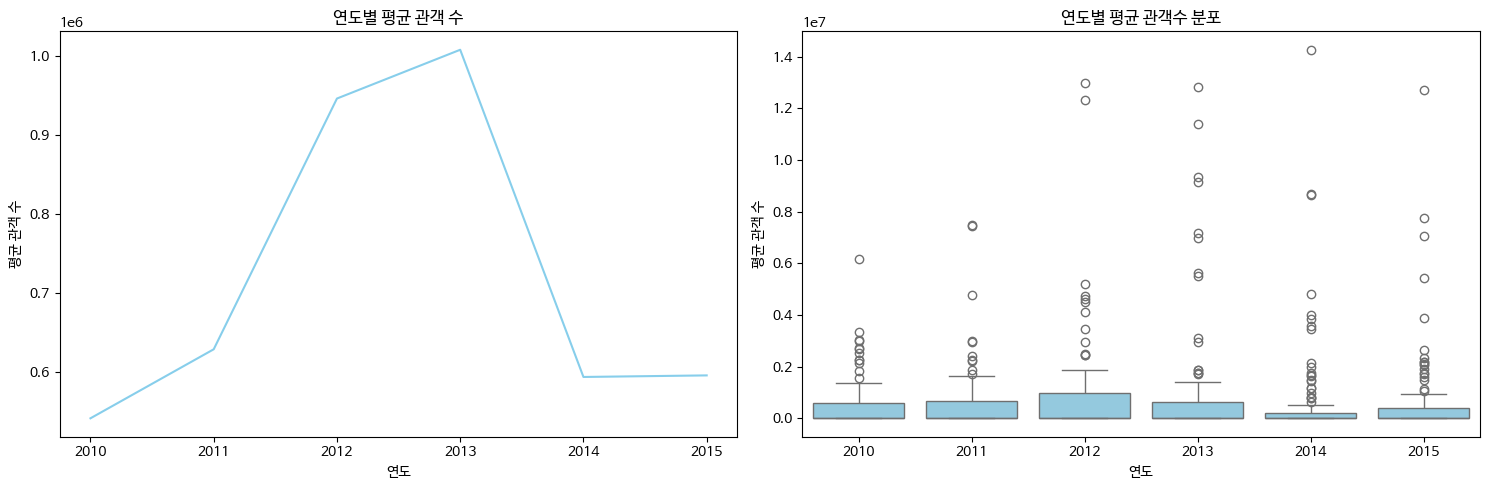

In [77]:
# 연도별 평균 관객 수를 계산
train['year'] = train['release_time'].dt.year
yearly_box_office = train.groupby('year')['box_off_num'].mean().reset_index()

# subplots을 생성
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# lineplot 시각화
sns.lineplot(data=yearly_box_office, x='year', y='box_off_num', ax=axes[0], color='skyblue')
axes[0].set_title('연도별 평균 관객 수')
axes[0].set_xlabel('연도')
axes[0].set_ylabel('평균 관객 수')

# boxplot 시각화
sns.boxplot(data=train, x = 'year', y = 'box_off_num', ax=axes[1])
axes[1].set_title('연도별 평균 관객수 분포')
axes[1].set_xlabel('연도')
axes[1].set_ylabel('평균 관객 수')

plt.tight_layout()
plt.show()

1-2) 연도에 따른 상영 등급 별 평균 관객 수 비교하기
- 연도에 따른 상영 등급 별 관객수를 line plot으로 시각화
- 이를 통해 상영 등급 별 평균 관객수 추이를 파악하고

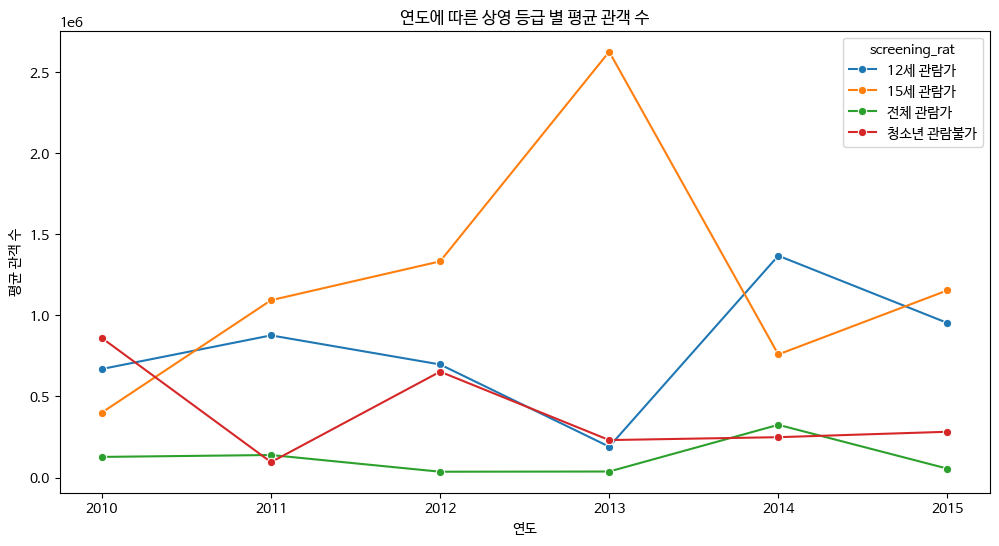

In [94]:
# 시간에서 연도만 추출
train['year'] = train['release_time'].dt.year

# 상영 등급별로 연도별 평균 관객 수 계산
avg_box_office_by_year_and_rating = train.groupby(['year', 'screening_rat'])['box_off_num'].mean().reset_index()

# lineplot 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_box_office_by_year_and_rating, x='year', y='box_off_num', hue='screening_rat', marker='o')

# 제목과 레이블 설정
plt.title('연도에 따른 상영 등급 별 평균 관객 수')
plt.xlabel('연도')
plt.ylabel('평균 관객 수')

plt.show()

1-3) 연도에 따른 상영 등급 별 가장 높은 관객수를 기록한 영화 찾기

In [95]:
# 상영 등급과 연도별로 가장 높은 관객 수를 기록한 영화 찾기
max_rate = train.loc[train.groupby(['year', 'screening_rat'])['box_off_num'].idxmax()]

# 결과 출력
for idx, row in max_rate.iterrows():
    print(f"연도: {row['year']}, 상영 등급: {row['screening_rat']}, 영화 제목: {row['title']}, 관객 수: {row['box_off_num']}")

연도: 2010, 상영 등급: 12세 관람가, 영화 제목: 헬로우 고스트, 관객 수: 3019960
연도: 2010, 상영 등급: 15세 관람가, 영화 제목: 초능력자, 관객 수: 2130645
연도: 2010, 상영 등급: 전체 관람가, 영화 제목: 마음이 2, 관객 수: 696382
연도: 2010, 상영 등급: 청소년 관람불가, 영화 제목: 아저씨, 관객 수: 6178665
연도: 2011, 상영 등급: 12세 관람가, 영화 제목: 조선명탐정 : 각시투구꽃의 비밀, 관객 수: 4786259
연도: 2011, 상영 등급: 15세 관람가, 영화 제목: 최종병기 활, 관객 수: 7482180
연도: 2011, 상영 등급: 전체 관람가, 영화 제목: 마당을 나온 암탉, 관객 수: 2202788
연도: 2011, 상영 등급: 청소년 관람불가, 영화 제목: 풍산개, 관객 수: 714136
연도: 2012, 상영 등급: 12세 관람가, 영화 제목: 타워, 관객 수: 5181014
연도: 2012, 상영 등급: 15세 관람가, 영화 제목: 도둑들, 관객 수: 12983841
연도: 2012, 상영 등급: 전체 관람가, 영화 제목: 나는 공무원이다, 관객 수: 217866
연도: 2012, 상영 등급: 청소년 관람불가, 영화 제목: 범죄와의 전쟁: 나쁜놈들 전성시대, 관객 수: 4720050
연도: 2013, 상영 등급: 12세 관람가, 영화 제목: 미스터 고, 관객 수: 1329061
연도: 2013, 상영 등급: 15세 관람가, 영화 제목: 7번방의 선물, 관객 수: 12811435
연도: 2013, 상영 등급: 전체 관람가, 영화 제목: 미나문방구, 관객 수: 334323
연도: 2013, 상영 등급: 청소년 관람불가, 영화 제목: 친구 2, 관객 수: 2971475
연도: 2014, 상영 등급: 12세 관람가, 영화 제목: 국제시장, 관객 수: 14262766
연도: 2014, 상영 등급: 15세 관람가, 영화 제목: 수상한 그녀, 관객 수: 8659725
연도:

**[시각화 분석]**

연도별 평균 관객 수를 분석한 결과를 보면 2012년과 2013년이 다른 해보다 높은 관객 수를 기록한 것을 확인할 수 있었습니다. 특히 2012년은 전반적으로 평균 관객 수가 높았으며, 다양한 영화들이 고르게 흥행하여 전체적으로 안정적인 관객 수 증가를 보인 해로 예측할 수 있었습니다. 반면, 2013년은 일부 영화가 매우 높은 관객 수를 기록하여 전체 평균을 끌어올린 것으로 보입니다.

이를 좀 더 구체적으로 살펴보기 위해 boxplot을 이용한 연도별 관객 수 분포 분석을 수행한 결과, 2012년은 분포 폭이 가장 넓어 다양한 관객 수를 기록한 영화들이 많았음을 시사합니다. 이는 특정 영화만이 아니라 여러 영화가 골고루 흥행했을 가능성을 나타내며, 시장 전반에 걸쳐 안정적인 성장을 보였음을 시사할 수 있습니다.

반면, 2013년은 이상값이 많이 나타난 것이 특징이었습니다. 이는 일부 영화들이 다른 영화들에 비해 급격히 높은 관객 수를 기록했음을 의미하며, 대형 블록버스터나 특정 히트작이 시장을 주도했을 가능성이 크다는 것을 추측해볼 수 있었습니다.

연도에 따른 상영등급별 평균 관객수를 시각화한 결과, 대체적으로 15세 관람가 영화가 높은 관객수를 기록하는 경향을 확인할 수 있었고, 특히 2013년에는 압도적으로 높은 관객수를 기록한 해였음을 알 수 있었습니다. 2010년에는 일반적으로 낮은 관객수를 보이는 청소년 관람불가 등급이 그 해에서 가장 높은 관객수를 기록한 등급으로 나타났습니다. 또한 2014년에는 12세 관람가 영화가 가장 높은 관객수를 기록했으며, 전체 관람가 영화들은 대체로 가장 낮은 관객수를 보이는 경향을 보였습니다.

각 연도별로 가장 높은 관객수를 기록한 영화가 어떤 영화 덕분에 해당 관객수를 차지했는지를 살펴본 결과, 2010년에는 영화 '아저씨'가 개봉함에 따라 청소년 관람불가 등급 영화가 높은 관객수를 기록하게 되었습니다. 2011년에는 15세 관람가 영화인 '최종병기 활'이 가장 높은 관객수를 기록했습니다. 2012년에는 15세 관람가 영화 '도둑들'이 개봉하여 전반적인 관객 수 증가에 기여한 것으로 보입니다. 2013년에는 15세 관람가 영화 '7번방의 선물'이 압도적인 관객수를 기록하게 된 것을 확인할 수 있었습니다. 또한 2013년에는 영화 '범죄와의 전쟁'과 같은 대형 블록버스터가 전체 관객 수를 증가시킨 요인으로 분석되었습니다. 2014년에는 12세 관람가 영화 '국제시장'의 개봉으로 높은 관객수를 기록한 해임을 알 수 있었습니다. 이를 통해 각 연도의 특정 영화들이 관객수에 큰 영향을 미쳤음을 확인할 수 있었습니다.



2-1) 상영시간에 따른 영화 편 수 확인하기

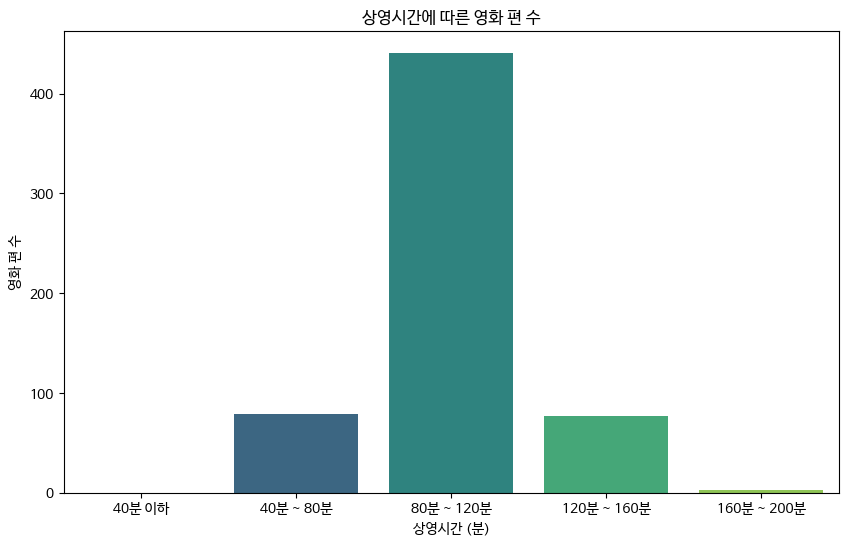

In [87]:
# 상영시간을 구간으로 그룹화하기
bins = [0, 40, 80, 120, 160, 200]
labels = ['40분 이하', '40분 ~ 80분', '80분 ~ 120분', '120분 ~ 160분', '160분 ~ 200분']
train['time_group'] = pd.cut(train['time'], bins=bins, labels=labels)

# 상영시간 구간별 영화 편 수 계산
time_group_count = train['time_group'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=time_group_count.index, y=time_group_count.values, palette='viridis')
plt.title('상영시간에 따른 영화 편 수')
plt.xlabel('상영시간 (분)')
plt.ylabel('영화 편 수')
plt.show()

2-2) 상영시간에 따른 장르별 관객수 파악하기

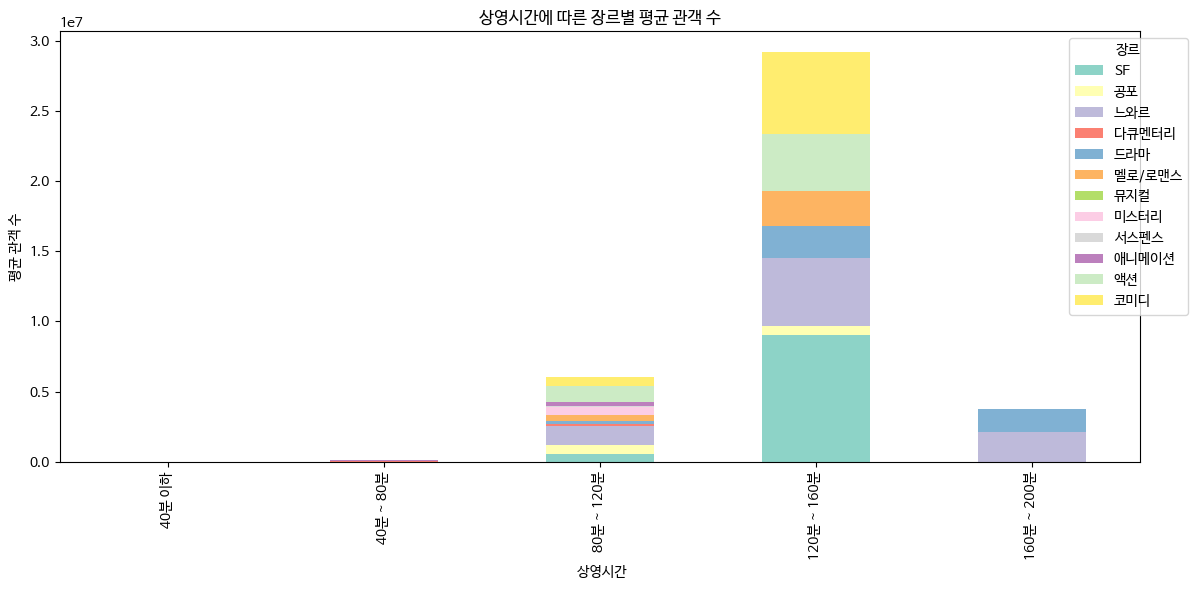

In [86]:
# 상영시간에 따른 장르별 평균 관객 수 계산
avg_nums = train.groupby(['time_group', 'genre'])['box_off_num'].mean().unstack().fillna(0)

# 장르별로 색을 다르게 하기 위한 색상 팔레트 지정
colors = sns.color_palette('Set3', n_colors=avg_num.shape[1])

# Barplot (각 장르를 쌓아서 올리는 방식으로 나타내기)
avg_nums.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# 제목과 레이블 설정
plt.title('상영시간에 따른 장르별 평균 관객 수')
plt.xlabel(' 상영시간')
plt.ylabel('평균 관객 수')

# 범례를 그래프 밖으로 설정
plt.legend(title='장르', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

[시각화 분석]

상영시간에 따른 영화의 편수 분석 결과, 80분에서 120분 사이의 영화가 가장 많은 수를 차지하는 것으로 나타났습니다. 이는 대부분의 영화들이 이 범위에 속한다는 것을 의미하며, 일반적으로 상영시간이 1시간 20분에서 2시간 내외로 설정되는 경향이 있음을 나타냅니다. 상영시간이 짧거나 긴 영화는 상대적으로 제작과 상영 측면에서 더 제한적이기 때문에 많은 영화들이 중간 범위의 상영시간을 선택하는 경향이 있다는 것을 알 수 있습니다.

한편 상영시간에 따른 장르별 평균 관객수 분석에서는 120분과 160분 사이의 영화가 가장 높은 관객수를 기록한 것으로 나타났습니다. 이는 장르별로 관객의 선호도가 상영시간에 영향을 받는다는 것을 의미합니다. 예를 들어, SF나 액션 영화처럼 이야기가 긴 전개를 요구하는 장르는 상영시간이 긴 경향이 있으며, 이러한 영화들이 더 많은 관객을 끌어들인다는 분석을 할 수 있습니다. 특히 상영시간이 길어질수록 깊이 있는 스토리 전개나 세밀한 제작이 가능해져 관객들에게 더 큰 인기를 얻는 것으로 해석할 수 있습니다.

상영시간이 긴 영화들이 대체로 높은 관객 수를 기록한 반면, 상영시간이 짧은 영화는 상대적으로 적은 관객 수를 기록하는 경향이 있었습니다. 이는 짧은 상영시간의 영화가 상대적으로 서사 전개에 한계가 있을 수 있으며, 관객들이 느끼는 만족도가 낮아질 가능성이 있음을 시사합니다. .

따라서 상영시간이 80분에서 120분 사이의 영화들이 대체로 제작되지만 장르나 영화의 특성에 따라 상영시간이 긴 영화들이 더 많은 관객을 확보할 수 있는 경향이 있다는 점을 확인할 수 있었습니다. 이는  장르별 관객의 특성을 반영하여 상영시간을 설정하는 것이 관객수 증대에 긍정적인 영향을 미칠 수 있음을 확인할 수 있었습니다.